# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
display(student_data)

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

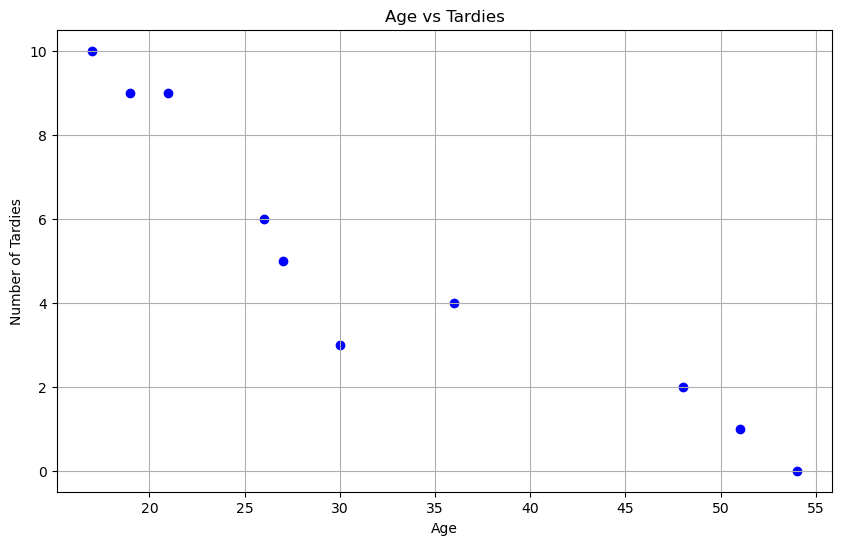

In [4]:
# Draw the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', marker='o')
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.grid(True)

# Show the plot
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Answer: The younger the student is, the more tardies he has.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
covariance_students = student_data.cov()
cov = covariance_students.loc['Age','Tardies']

correlation_students = student_data.corr()

corr = correlation_students.loc['Age','Tardies']

print(f'Covariance: {cov}')

print(f'Correlation: {corr}')


## Covariance is the joint difference between the 2 variables. If the covariance is positive, it means the variables tend to increase together. 
### In this case, as negative, one variable tends to increase when the other decreases.

## Correlation shows the interdependence of variables in a range from -1 to 1.
### A correlation = 1 shows a perfect linear relationship. -1 implies in a perfect negative linear relationship.

### In this case with both covariance and correlation negative indicates as the age increases, the tardies decreases.



Covariance: -45.56666666666666
Correlation: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [36]:
#### TRAINING WITH TEST DATA

# Define the independent variable (X) and dependent variable (y) 
X = student_data[['Age']] # Using double brackets to get a 2D array for scikit-learn
y = student_data['Tardies']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) checking if we generated the right shapes

# Initialize the Linear Regression object that will be fed later on
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Making predictions using the test data
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

# Printing the results
print(f'MSE Test: {mse_test}')
print(f'R2 score Test: {r2_test}')




MSE Test: 18.249242759454475
R2 score Test: -26.373864139181713


In [38]:
## PREDICTING ON TESTING DATA

# Define the independent variable (X) and dependent variable (y) 
X = student_data[['Age']] # Using double brackets to get a 2D array for scikit-learn
y = student_data['Tardies']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) checking if we generated the right shapes

# Initialize the Linear Regression object that will be fed later on
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Making predictions using the training data
y_train_pred = model.predict(X_train)

# Calculate MSE and R2 score
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)


# Printing the results
print(f'MSE Training: {mse_train}')
print(f'R2 score Training: {r2_train}')


MSE Training: 1.007724074640563
R2 score Training: 0.8456922510706638


In [39]:
print(f'MSE Training: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 score Training: {r2_train}')
print(f'R2 score Test: {r2_test}')

MSE Training: 1.007724074640563
MSE Test: 18.249242759454475
R2 score Training: 0.8456922510706638
R2 score Test: -26.373864139181713


Plot your regression model on your scatter plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


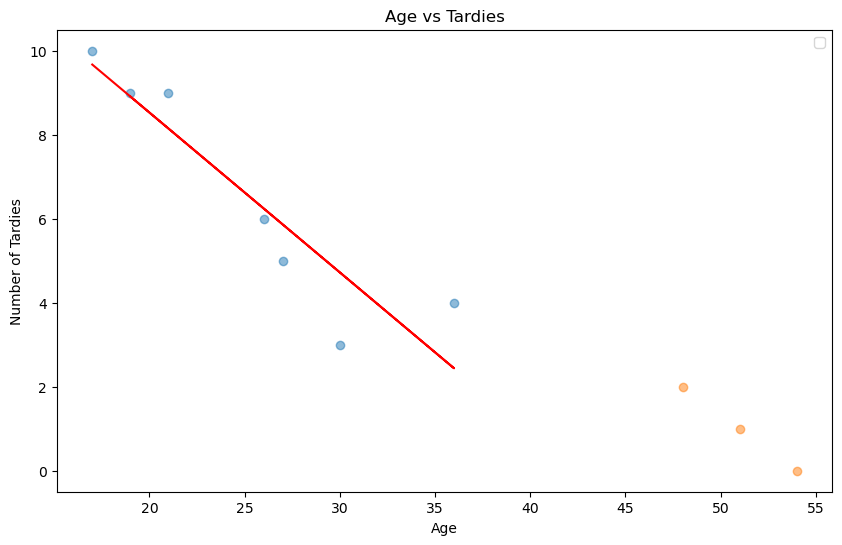

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

MSE says that, on average, the squared difference between the predicted and actual number of tardies is 18.25, which says that the model is not good and my assumption is on the data size, which we have 10 rows only. The model overfit on training.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("C:\\Users\\Francesco Corda\\Documents\\GitHub\\lab-regression-analysis-en\\vehicles.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [45]:
# filtering my columns to be used
variables =['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

# new subset using my selected variables
selected_data = vehicles[variables]

# calculating correlations

corr = selected_data.corr()
print(corr)

# Based on the correlations:
# - 'Fuel Barrels/Year' and 'Fuel Cost/Year' are expected to have strong positive correlations with 'CO2 Emission Grams/Mile' because vehicles that consume more fuel tend to emit more CO2.
# - 'Combined MPG' is expected to have a strong negative correlation with 'CO2 Emission Grams/Mile' because higher MPG indicates lower fuel consumption and hence lower CO2 emissions.
# - 'Cylinders' may have a moderate positive correlation with 'CO2 Emission Grams/Mile' since vehicles with more cylinders tend to have larger engines and higher fuel consumption.
# - 'Year' may have a weak negative correlation with 'CO2 Emission Grams/Mile' due to advancements in technology leading to more fuel-efficient vehicles over time.

# The variable most important in determining CO2 emissions is likely 'Fuel Barrels/Year' or 'Combined MPG', as they are directly related to fuel consumption and efficiency, which directly affect CO2 emissions.


                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [47]:
#### TRAINING WITH TEST DATA

# Define the independent variable (X) and dependent variable (y) 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) checking if we generated the right shapes

# Initialize the Linear Regression object that will be fed later on
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Making predictions using the test data
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

# Printing the results
print(f'MSE Test: {mse_test}')
print(f'R2 score Test: {r2_test}')


MSE Test: 256.8951075186601
R2 score Test: 0.9816221846322115


In [48]:
#### TRAINING WITH TEST DATA. PERFORMING THE TEST FOR EACH VARIANT

# Define the independent variable (X) and dependent variable (y) 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

n_features = len(X_train.columns)  # Get number of features from training data (more reliable)

scores = []

for i in range(n_features):
    # Select feature by name (assuming column names are informative)
    feat_name = X_train.columns[i]  # Use training data for column names
    feat1_train = X_train[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature
    feat1_test = X_test[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature

    # Train model
    regr_feat1 = LinearRegression()
    regr_feat1.fit(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable

    # Predict (assuming y_test is a Series)
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)

    # Evaluate model (using mean squared error)
    train_score = regr_feat1.score(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable
    test_score = regr_feat1.score(feat1_test, y_test.values.reshape(-1, 1))  # Reshape target variable
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    scores.append([feat_name, train_score, test_score, mse_train, mse_test])

# Print or analyze scores as needed
print(pd.DataFrame(scores, columns=["Feature", "Train Score", "Test Score", "Train MSE", "Test MSE"]))

             Feature  Train Score  Test Score     Train MSE      Test MSE
0               Year     0.048599    0.051358  13566.309852  13260.633877
1          Cylinders     0.565352    0.567861   6197.773458   6040.679308
2  Fuel Barrels/Year     0.971923    0.974101    400.351983    362.030807
3       Combined MPG     0.854769    0.865257   2070.897797   1883.513709
4     Fuel Cost/Year     0.867468    0.864215   1889.807353   1898.077071


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [49]:
## The most important variable: 'Fuel Barrels/Year' has the highest train and test scores, indicating 
# that it is the most important variable in the model, suggesting this is strongly associated with CO2 emissions.

# 'Combined MPG' also has relatively high train and test scores, indicating its importance in the model. 
# Higher combined MPG values (indicating better fuel efficiency) are associated with lower CO2 emissions.

# 'Fuel Cost/Year' has slightly lower but still respectable train and test scores. it also provides useful information about the cost of fuel consumption, which is related to CO2 emissions.

# Conclusions:
# - Fuel-related variables ('Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year') are important predictors of CO2 emissions, which is consistent with expectations.
# - Cylinders and Year have less influence on CO2 emissions compared to fuel-related variables.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [54]:
party_data = pd.DataFrame({'people_invited': [1,3,4,6,8,9,11,14], 'attendees': [1,2,4,4,5,7,8,13]})
display(party_data)

,people_invited,attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

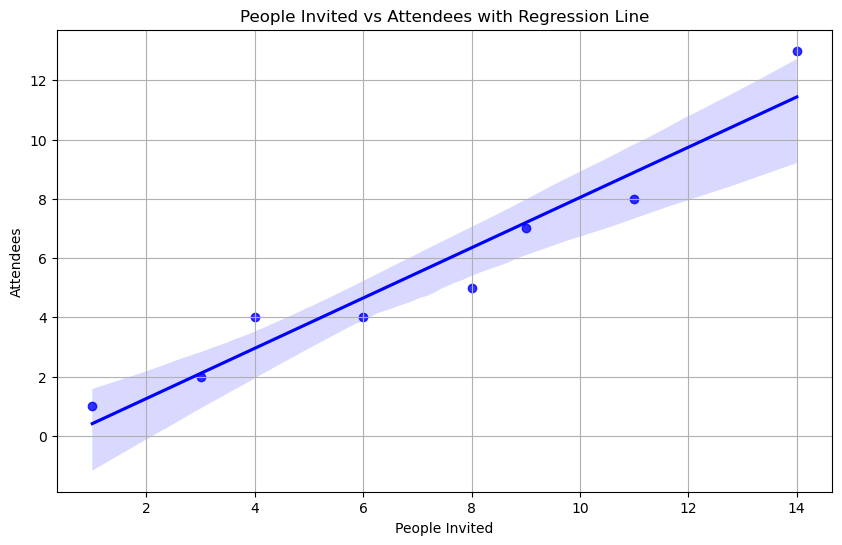

In [57]:
# Draw the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='people_invited', y='attendees', data=party_data, scatter=True, color='blue', marker='o')
plt.title('People Invited vs Attendees with Regression Line')
plt.xlabel('People Invited')
plt.ylabel('Attendees')
plt.grid(True)

# Show the plot
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Answer: There appears to be a positive linear relationship between the number of people invited and the number of attendees. As the number of people invited increases, the number of attendees also tends to increase.



In [60]:
#### TRAINING WITH TEST DATA

# Define the independent variable (X) and dependent variable (y) 
X = party_data[['people_invited']]
y = party_data['attendees']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) checking if we generated the right shapes

# Initialize the Linear Regression object that will be fed later on
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Making predictions using the test data
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

mse_test = mean_squared_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

# Printing the results
print(f'MSE Test: {mse_test}')
print(f'R2 score Test: {r2_test}')

MSE Test: 0.4628531752390117
R2 score Test: 0.9328116358524016


In [61]:
# PREDICTING ON TESTING DATA

# Define the independent variable (X) and dependent variable (y) 
X = party_data[['people_invited']]
y = party_data['attendees']

# split the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state makes sure we have the same sample every time we run the code.

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) checking if we generated the right shapes

# Initialize the Linear Regression object that will be fed later on
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Making predictions using the training data
y_train_pred = model.predict(X_train)

# Calculate MSE and R2 score
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)


# Printing the results
print(f'MSE Training: {mse_train}')
print(f'R2 score Training: {r2_train}')


MSE Training: 1.2607594936708861
R2 score Training: 0.8927925600619995


In [62]:
print(f'MSE Training: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 score Training: {r2_train}')
print(f'R2 score Test: {r2_test}')

MSE Training: 1.2607594936708861
MSE Test: 0.4628531752390117
R2 score Training: 0.8927925600619995
R2 score Test: 0.9328116358524016


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [63]:
# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

Coefficients: [0.91139241]
Intercept: -1.0379746835443049


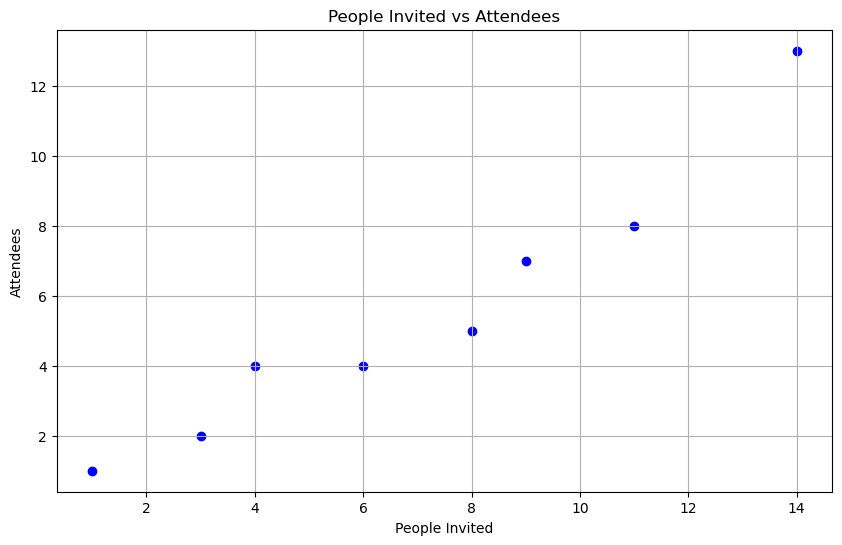

In [64]:

# Draw the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(party_data['people_invited'], party_data['attendees'], color='blue', marker='o')
plt.title('People Invited vs Attendees')
plt.xlabel('People Invited')
plt.ylabel('Attendees')
plt.grid(True)

# Show the plot
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [66]:
# Identify the index of the outlier data point
outlier_index = party_data['people_invited'].idxmax()

# Remove the outlier data point
party_data_filtered = party_data.drop(index=outlier_index)

# Split the data into predictor variable X and outcome variable y
X = party_data_filtered[['people_invited']]
y = party_data_filtered['attendees']

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error and R² score on the test data
mse_test_no_outlier = mean_squared_error(y_test, y_pred)
r2_test_no_outlier = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (no outlier):", mse_test_no_outlier)
print("R² Score (no outlier):", r2_test_no_outlier)

Mean Squared Error (Test): 0.46728971962616833
R² Score (Test): 0.9321676213445884


In [68]:
print(f'MSE Training: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f"MSE (no outlier):", mse_test_no_outlier)
print(f'R2 score Training: {r2_train}')
print(f'R2 score Test: {r2_test}')
print("R2 Score (no outlier):", r2_test_no_outlier)


MSE Training: 1.2607594936708861
MSE Test: 0.46728971962616833
MSE (no outlier): 0.46728971962616833
R2 score Training: 0.8927925600619995
R2 score Test: 0.9321676213445884
R2 Score (no outlier): 0.9321676213445884


removing the outlier has resulted in slight changes in the MSE and R2 score for the test set, while the scores for the training set remain unchanged. This indicates that the outlier had a more significant impact on the test set performance than on the training set performance.

The model without the outlier has a high R2 score of 0.93, indicating that it explains about 93% of the variance in the test data. This suggests that the model generalizes well to new data points.